So far, we have looked at two types of linear regression models and how to implement them in python using scikit-learn. To recap, we began with a [simple linear regression (SLR)](http://www.enlistq.com/implementing-simple-linear-regression-model-in-python/) model where we have one independent variable (feature) and one dependent variable (label). We then expended it slightly to a more general use case where we had multiple independent variables and one dependent variable. We called it [multivariate linear regression model](http://www.enlistq.com/implementing-multivariate-linear-regression-model-python/). 

Both of these models result in a straight line or plane (if in multiple dimensions) which is very convenient but a bit too simplistic in the real world. Most real world problems cannot be easily modeled by a simple or multivariate linear regression model. For them, you need a non-linear model called polynomial regression model. 

A polynomial model can be represented by an equation of this form:

![polynomial regresion model](https://wikimedia.org/api/rest_v1/media/math/render/svg/bc6e10cc75097fa66e7e02d6a75491d14a0c4aba)

Polynomial regression model is a type of linear regression model which can be confusing to some. The reason is that while the model is nonlinear, the regression function that is used to estimate the coefficients is linear. In fact, polymonial regression is a special case of multivariate linear regression.


## How can I implement polynomial regression model?

Implementing a polynomial regression model is slightly different than implementing a simple or multivariate linear regression model. You still use the linear regression model but before you do that, you have to construct polynomial features of your coefficients. 

Here are the steps we are going to follow as usual:

- Exploring the dataset
- Splitting the dataset into training and testing set
- Building the model
- Evaluating the model

## Exploring the dataset
For this example, I have created a non-linear version of the soda sales dataset that we looked at when we implemented linear regression model. The dataset has two columns: temperature (feature) and units_sold (label). Our job is to build a model that we can use to predict soda units sold for a given temperature.

In [1]:
# Let's load the data into python and take a look at it
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

dataset = pd.read_csv(r'soda.csv')

dataset.head()

,temperature,units_sold
0,44.0,2600.0
1,96.0,12126.0
2,96.0,12107.0
3,36.0,1639.0
4,42.0,2400.0


In [2]:
# Let's get some more information about our dataset
dataset.describe()

,temperature,units_sold
count,50.000000,50.000000
mean,62.720000,5699.840000
std,20.945059,3619.349493
min,30.000000,1042.000000
25%,44.000000,3037.500000
50%,60.500000,4992.000000
75%,77.000000,7503.500000
max,99.000000,13194.000000


We can see there are 50 rows and 2 columns in our table. The mean of temperature and units_sold is 62.72 F and 5699.84 units respectively.

Before we can work on implementing the model, we need to visualize the dataset and decide whether it is safe to assume that the data exhibits non-linear relationship. 

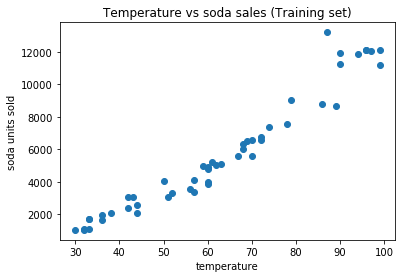

In [3]:
# Scatter plot
plt.scatter(dataset.temperature, dataset.units_sold);
plt.title('Temperature vs soda sales (Training set)');
plt.xlabel('temperature');
plt.ylabel('soda units sold');

As you can see, the graph shows there is a slight non-linear relationship between temperature and soda units sold. At this stage, you can take the simpler route and assume that the relationship is linear and implement an SLR model. That might work for you but a non-linear might provide better results.

## Preprocessing the dataset
Preprocessing the dataset is necessary most of the times but since this is dummy data that I created, we don't need to change anything. There is no missing data so we don't need to fill any values. Since, we are implementing linear regression model, we don't need to perform feature scaling. And, because we are not dealing with any categorical data, we don't need to worry about feature encoding.

Only thing we need to do is split the dataset into dependent variable and independent variable so that we can feed it to our machine learning model. 

Keep in mind, that life is never this easy and data preprocessing is a very crucial step in the machine learning process and often the most time consuming. 

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

## Splitting the dataset into training and testing set
Polynomial regression model is a supervised learning model (see my earlier post on [supervised and unsupervised models](http://www.enlistq.com/difference-between-supervised-and-unsupervised-learning-models/)) which means we need to feed it some data first to train it. And, once it is trained, we need to test it on a different set of data to evaluate it. To do this, we need to split our dataset into training and testing set. Rule of thumb is to assign 80% of the dataset to training and 20% to testing but to change things up a bit, I am going for a 70-30 split this time. 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

At this point, we have four different arrays:
- X_train - independent variable (training set)
- X_test - independent variable (testing set)
- y_train - dependent variable (training set)
- y_test - dependent variable (testing set)

## Building the model
This is the step where we actually build our model. For the most part, steps are same as implementing a linear regression model but before we do that, we need to extract polynomial features. You will notice that to do that we need to specify a value for 'degree' which tells the model what kind of polynomial model we want to build. This is a big assumption that we have to make. For now, we will stick with degree = 2 but you can play around with different values and see how that impacts your model. In a future post, I will discuss how to come up with the optimum value for degree.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Extracting polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression

# Create regressor using linear regression
regressor = LinearRegression()

# Training our model
regressor.fit(X_train_poly, y_train)

# Predicting values using our trained model
y_pred = regressor.predict(X_test_poly)

We now have our predicted values, y_pred, and our actual values, y_test. We can compare these values to see how well our model performed through visualization.

## Evaluating the model

As we can see, our predicted values are plotted via blue dashed line which passes through most of the test data points. Notice that the line is curved because it was modeled using a non-linear model. 

Of course, there are some outliers here and there. We don't want our line of best fit to cover every single point because that would be overfitting!

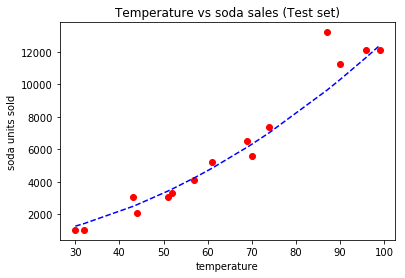

In [9]:
# Let's see how well the model does against our test data.
plt.scatter(X_test, y_test, color = 'red')
plt.plot(sorted(X_test), sorted(y_pred), '--',color = 'blue')
plt.title('Temperature vs soda sales (Test set)')
plt.xlabel('temperature')
plt.ylabel('soda units sold')
plt.show()

Visualizing our predictions and actual results is good for quick comparison but when working with big datasets, you would want to quantify how well your model performed. There are several statistical measures to do that such as explained variance score, mean absolute error, mean squared error and r-squared score.

We are not going to dive deeper into ways to evaluate models in this post.

In [10]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
ex_var_score = explained_variance_score(y_test, y_pred)
m_absolute_error = mean_absolute_error(y_test, y_pred)
m_squared_error = mean_squared_error(y_test, y_pred)
r_2_score = r2_score(y_test, y_pred)

print("Explained Variance Score: "+str(ex_var_score))
print("Mean Absolute Error "+str(m_absolute_error))
print("Mean Squared Error "+str(m_squared_error))
print("R Squared Score "+str(r_2_score))


Explained Variance Score: 0.939917642502
Mean Absolute Error 639.730961994
Mean Squared Error 1065895.39264
R Squared Score 0.935937688603


Our r squared score is 0.936 which is quite good. I will cover these metrics is more detail in a separate post.